<a href="https://colab.research.google.com/github/ankita9084/Cotton-disease-prediction/blob/main/Cotton_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE=[224,224]

train_path='/content/drive/MyDrive/Programs/Datasets/cotton disease/train-20210921T085243Z-001'
valid_path='/content/drive/MyDrive/Programs/Datasets/cotton disease/test-20210921T085010Z-001'

In [ ]:
resnet= ResNet50(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/MyDrive/Programs/Datasets/cotton disease/train-20210921T085243Z-001/train/*')

In [ ]:
x=Flatten()(resnet.output)

In [ ]:
len(folders)

4

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/cotton disease/train-20210921T085243Z-001/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')



Found 1951 images belonging to 4 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/cotton disease/test-20210921T085010Z-001/test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 18 images belonging to 4 classes.


In [ ]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1279s 20s/step - loss: 2.1372 - accuracy: 0.4090 - val_loss: 1.4383 - val_accuracy: 0.3889
Epoch 2/20
61/61 [==============================] - 45s 728ms/step - loss: 1.1016 - accuracy: 0.5725 - val_loss: 1.0515 - val_accuracy: 0.4444
Epoch 3/20
61/61 [==============================] - 44s 716ms/step - loss: 0.9543 - accuracy: 0.6402 - val_loss: 0.8531 - val_accuracy: 0.6111
Epoch 4/20
61/61 [==============================] - 44s 725ms/step - loss: 0.8488 - accuracy: 0.6535 - val_loss: 0.7963 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 44s 712ms/step - loss: 0.9225 - accuracy: 0.6222 - val_loss: 1.1879 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 43s 711ms/step - loss: 0.8854 - accuracy: 0.6525 - val_loss: 0.7678 - val_accuracy: 0.7222
Epoch 7/20
61/61 [==============================] - 44s 718ms/step - loss: 0.8733 - accuracy: 0.6674 - val_loss: 0.6213 - val_accuracy: 0.7778

In [ ]:
import matplotlib.pyplot as plt


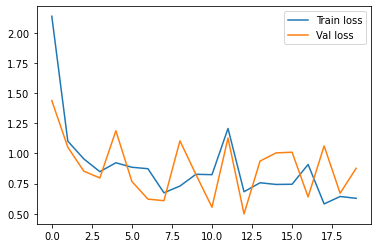

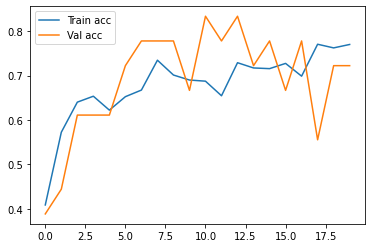

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='Train acc')
plt.plot(r.history['val_accuracy'], label='Val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred=model.predict(test_set)

In [ ]:
y_pred

array([[3.3485019e-05, 8.9543802e-04, 9.9811018e-01, 9.6090575e-04],
       [2.4730191e-04, 3.5924651e-04, 4.3689992e-02, 9.5570350e-01],
       [4.1856587e-05, 9.8810685e-01, 6.1502564e-03, 5.7011130e-03],
       [9.6585965e-01, 8.5414722e-06, 3.0504497e-02, 3.6273075e-03],
       [5.4184187e-05, 9.9724352e-01, 2.9669398e-05, 2.6726318e-03],
       [5.1519915e-04, 3.8514298e-03, 9.9507219e-01, 5.6118297e-04],
       [2.7193487e-04, 3.5434198e-01, 3.9699048e-02, 6.0568702e-01],
       [3.6347614e-04, 5.4759802e-03, 9.8955512e-01, 4.6054344e-03],
       [5.7982263e-05, 9.6980053e-01, 8.0332300e-03, 2.2108171e-02],
       [5.8340760e-07, 6.8211421e-07, 9.9995029e-01, 4.8405189e-05],
       [4.4021530e-05, 9.8170495e-01, 3.8405786e-05, 1.8212665e-02],
       [6.1088067e-05, 2.3050912e-01, 7.8876447e-03, 7.6154214e-01],
       [2.5167992e-05, 2.3946798e-06, 9.9997103e-01, 1.4006328e-06],
       [3.0206854e-03, 9.2869782e-01, 1.1830529e-02, 5.6450937e-02],
       [9.1859984e-05, 5.1029682e-

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 3, 1, 0, 1, 2, 3, 2, 1, 2, 1, 3, 2, 1, 1, 1, 3, 1])